In [1]:
import ginsim
import biolqm
import pypint
import maboss


This notebook has been executed using the docker image `colomoto/colomoto-docker:2019-10-16`

# Model of the cellular network driving T cell specification

This model integrates current data on the cellular network driving mouse T cell specification in thymus. Initially, progenitor cells entering into the thymus have a broad potential, incuding T and B lymphocytes, innate lymphoic cells, Natural killer cells, and various myeloid fates. Notch signalling progressively activated a series of T cell transcription factors, leading to a progressive T cell commitment, which become irreversible at the DN2b stage.
This process progressively involves a constellation of transcription factors taking part in various regulatory circuit, including GATA-3, TCF-1, E. proteins, and Bcl11b.

In [2]:
# Load the model
lrg = ginsim.load("Tdev_2nov2019.zginml")
# Convert the model to BioLQM
lqm = ginsim.to_biolqm(lrg)


In [3]:
# Display the regulatory graph
ginsim.show(lrg)


This regulatory graph encompasses 56 components, including three input cytokines: Delta, IL7 and MCSF, which are necessary for T, B and myeloid cell specification, respectively.
A color code denotes the main roles of network components in cell fate delineation: green for T cell, blue for B cell, orange for myeloid, red for stem and other alternative fates.Green arrows correspond to activations, blunt red arcs to inhibitions, while blue hybrid arrows denote dual interactions (e.g. with a sign depending on the level of the regulator or on the presence of cofactors).
Green arrows denote activations, blunt red arcs denote inhibitions, while blue hybrid arrows denote dual interactions (e.g. with a sign depending on the level of the regulator or on the presence of cofactors).

In [4]:
# Define reporter components
reporter_components = ["EBF1","Pax5","Pu1","CEBPa","Gata3","TCF1","Runx1","Bcl11b", "Id2","Scl","NTC", "TCRb","pTa"]


The model encompasses 56 molecular components, including  three inputs: Delta, IL7 and MCSF.

# Computation of stable states and verification of their reachability from DN1 state

## Stable states

We can compute the stable states  of the model.

In [5]:
# Find fixed points, also called stable states
fps = biolqm.fixpoints(lqm, autoconvert=False).project_on_components(reporter_components)
biolqm.states_to_dataframe(fps)

# Generation of a python dataframe containing all stable states, easy to filter.
fpsdf = biolqm.states_to_dataframe(biolqm.fixpoints(lqm, autoconvert=False))
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm, autoconvert=False).project_on_components(reporter_components))

# generation of a list of dictionaries for all stable states, easy to display.  
fpsdic = biolqm.fixpoints(lqm)


The stables states are stored in python structures.
The following command returns the number of stable states found.

In [6]:
len(fpsdf)


28

The model has 28 stable states, which are displayed in a table by the following command line.

In [7]:
fpsdf


,CEBPb,CEBPa,Id2,Id1,Id3,Scl,Scl_E2A,Lmo2,Gfi1b,Kit,...,IL7Ra_gene,IL7Ra_act,Stat5,CD45,CD44,Deltex,Nrarp,MCSF,IL7,Delta
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,1,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,1,1,1,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


The stable states can be visualised directly on the network (drawn with GINsim) by using the following command, which is illustrated below for the stable state corresponding to DN2b stage (with index 22).

In [8]:
# Displaying the T cell commitment stable state on the regulatory graph (colour intensities represent qualitative levels)
ginsim.show(lrg,fpsdic[2])


In [9]:
len(fpsdfproj)


5

The 28 stable states correspond to 5 stable paterns projected on the eight reporter components (EBF1, Pax5, Pu1, CEBPa, Gata3, TCF1, Bcl11b, Id2).

In [10]:
# Generation of a table listing all stable states projected on reporter components
fpsdfproj


,CEBPa,Id2,Scl,Pu1,EBF1,Pax5,Gata3,TCF1,Bcl11b,Runx1,pTa,TCRb,NTC
0,0,0,0,1,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0
4,1,1,0,2,0,0,0,0,0,1,0,0,0


The first pattern corresponds to a T cell committed state (DN2b), the second a nul state, the third one to a to a B cell progenitor, the fourth one to ILC progenitor, and the last one to myeloid progenitor. 

## Define mutant versions of the model and compute the corresponding stable state patterns

In [11]:
# Definition of Bcl11b LoF mutants
lqm_Bcl11b_LoF = biolqm.perturbation(lqm,"Bcl11b%0")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Bcl11b_LoF, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj


,CEBPa,Id2,Scl,Pu1,EBF1,Pax5,Gata3,TCF1,Bcl11b,Runx1,pTa,TCRb,NTC
0,0,0,0,1,0,0,1,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0
4,1,1,0,2,0,0,0,0,0,1,0,0,0


In [12]:
# Definition of Bcl11b GoF mutants
lqm_Bcl11b_GoF = biolqm.perturbation(lqm,"Bcl11b%1")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Bcl11b_GoF, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj


,CEBPa,Id2,Scl,Pu1,EBF1,Pax5,Gata3,TCF1,Bcl11b,Runx1,pTa,TCRb,NTC
0,0,0,0,1,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,1,1,0,0,0
3,0,0,0,1,1,1,0,0,1,1,0,0,0
4,1,0,0,2,0,0,0,0,1,1,0,0,0


In [13]:
# Definition of TCF1 LoF mutant
lqm_TCF1_LoF = biolqm.perturbation(lqm,"TCF1%0")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_TCF1_LoF, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj


,CEBPa,Id2,Scl,Pu1,EBF1,Pax5,Gata3,TCF1,Bcl11b,Runx1,pTa,TCRb,NTC
0,0,0,0,1,0,0,1,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0
4,1,1,0,2,0,0,0,0,0,1,0,0,0


In [14]:
# Definition of TCF1 GoF mutant
lqm_TCF1_GoF = biolqm.perturbation(lqm,"TCF1%1")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_TCF1_GoF, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj


,CEBPa,Id2,Scl,Pu1,EBF1,Pax5,Gata3,TCF1,Bcl11b,Runx1,pTa,TCRb,NTC
0,0,0,0,1,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,1,1,0,1,0,1,0,0,0
3,0,1,0,1,0,0,0,1,0,1,0,0,0


In [15]:
# Definition of Gata3 LoF mutant
lqm_Gata3_LoF = biolqm.perturbation(lqm,"Gata3%0")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Gata3_LoF, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj


,CEBPa,Id2,Scl,Pu1,EBF1,Pax5,Gata3,TCF1,Bcl11b,Runx1,pTa,TCRb,NTC
0,0,0,0,1,0,0,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0
4,1,1,0,2,0,0,0,0,0,1,0,0,0


In [16]:
# Definition of Gata3 GoF mutant
lqm_Gata3_GoF = biolqm.perturbation(lqm,"Gata3%2")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Gata3_GoF, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj


,CEBPa,Id2,Scl,Pu1,EBF1,Pax5,Gata3,TCF1,Bcl11b,Runx1,pTa,TCRb,NTC
0,0,0,0,1,0,0,2,0,0,1,0,0,1
1,0,0,1,0,0,0,2,0,0,0,0,0,0
2,0,1,1,1,0,0,2,0,0,1,0,0,0


In [17]:
# Definition of Runx1 LoF mutants
lqm_Runx1_LoF = biolqm.perturbation(lqm,"Runx1%0")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Runx1_LoF, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj


,CEBPa,Id2,Scl,Pu1,EBF1,Pax5,Gata3,TCF1,Bcl11b,Runx1,pTa,TCRb,NTC
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Definition of Runx1 GoF mutants
lqm_Runx1_GoF = biolqm.perturbation(lqm,"Runx1%2")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Runx1_GoF, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj


,CEBPa,Id2,Scl,Pu1,EBF1,Pax5,Gata3,TCF1,Bcl11b,Runx1,pTa,TCRb,NTC
0,0,0,0,1,0,0,1,1,1,2,1,1,1
1,0,0,0,0,0,0,0,0,0,2,0,0,0
2,0,0,0,1,1,1,0,0,0,2,0,0,0
3,0,1,0,1,0,0,0,0,0,2,0,0,0


In [19]:
# Definition of Delta LoF mutant
lqm_Delta_LoF = biolqm.perturbation(lqm,"Delta%0")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Delta_LoF, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj


,CEBPa,Id2,Scl,Pu1,EBF1,Pax5,Gata3,TCF1,Bcl11b,Runx1,pTa,TCRb,NTC
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0,0,1,0,0,0
3,1,1,0,2,0,0,0,0,0,1,0,0,0


In [20]:
# Definition of double Pu1 + CEBPa GoF mutant 
# (for ETP reprogramming into myeloid cells)
lqm_Pu1_CEBPa_GoF = biolqm.perturbation(lqm,"Pu1%2")
lqm_Pu1_CEBPa_GoF = biolqm.perturbation(lqm_Pu1_CEBPa_GoF,"CEBPa%1")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Pu1_CEBPa_GoF, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj


,CEBPa,Id2,Scl,Pu1,EBF1,Pax5,Gata3,TCF1,Bcl11b,Runx1,pTa,TCRb,NTC
0,1,1,0,2,0,0,0,0,0,1,0,0,0


## Verification of comitment pattern reachability using pint

In [21]:
# Translate the original model into a a discrete automata using bioloqm
lqm = ginsim.to_biolqm(lrg)
an = biolqm.to_pint(lqm)
# an stands for automata network
# Definition of an initial state corresponding to the progenitor entering the thymus
an = an.having(IL7=1,Delta=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,prog_ass_Eprot=1,HEB_gene=1,Notch_gene=1,Nrarp=1)
# Definition of a committed T cell target pattern in pint and verify its reachability for the wildtype model
an.reachability("Gata3=1,TCF1=1,Bcl11b=1")
# This may take about a minute on a personal computer...


True

Hence, The T cell commitment state can be reached from the pre-thymic state in the presence of Delta and IL7.

In [22]:
lqm = ginsim.to_biolqm(lrg)
an = biolqm.to_pint(lqm)
# Definition of an initial state corresponding to the progenitor entering the thymus, but with Delta OFF
an = an.having(Delta=0,IL7=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,HEB_gene=1,HEB=1,HEB_E2A=1,Notch_gene=1,Nrarp=1)
# Definition a B cell target pattern  corresponding to B cell fate and verify its reachability for the wildtype model
an.reachability("EBF1=1,Pax5=1")


True

Hence, a B cell state can also be reached from the pre-thymic state.

In [23]:
lqm = ginsim.to_biolqm(lrg)
an = biolqm.to_pint(lqm)
# Definition of an initial state corresponding to the ETP,including Gata3 and TCF1 both ON.
# an = an.having(IL7=1,Delta=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,prog_ass_Eprot=1,Gata3=1,TCF1=1,HEB_gene=1,Notch_gene=1,Nrarp=1)
# an.reachability("EBF1=1,Pax5=1")
# Definition of an initial states corresponding to the DN2a stage
an = an.having(Delta=0,IL7=1,CEBPa=1,Id1=1,Scl=1,Gfi1b=1,Kit=1,Pu1=1,Lyl1=1,Hhex=1,Ikaros=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,prog_ass_Eprot=1,CD25=1,Gata3=1,TCF1=1,HEB_gene=1,Runx1=1,Lef1=1,pTa=1,Rag1=1,CD3e=1,CD3g=1,Hes1=1,Notch_gene=1,NTC=1,Notch1_rec=1,IL7Ra_gene=1,IL7Ra_act=1,Stat5=1,Nrarp=1)
an.reachability("EBF1=1,Pax5=1")
# This may take a few minutes on a personal computer...


True

According to the model, the B cell state can still be reached from DNA2a cells...

In [24]:
# Definition of a pint model for Bcl11b loss-of-function
an_Bcl11b_LoF = biolqm.to_pint(lqm_Bcl11b_LoF)
an_Bcl11b_LoF = an_Bcl11b_LoF.having(IL7=1,Delta=1,CEBPa=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,HEB_gene=1,HEB=1,HEB_E2A=1,Notch_gene=1,Nrarp=1)
#Verification of commitment pattern reachability without Bcl11b activation
an_Bcl11b_LoF.reachability("TCF1=1,Gata3=1", fallback="nusmv")
#?an_Bcl11b_LoF.reachability - to get the doc of the function

True

Hence, a loss-of-function of Bcl11b does not impede the activation of Gata3 and TCF1.

In [25]:
# Definition of a pint model for Bcl11b gain-of-function
an_Bcl11b_GoF = biolqm.to_pint(lqm_Bcl11b_GoF)
an_Bcl11b_GoF = an_Bcl11b_GoF.having(Bcl11b=1,IL7=1,Delta=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,prog_ass_Eprot=1,HEB_gene=1,Notch_gene=1,Nrarp=1)
#Verification of commitment pattern reachability
an_Bcl11b_GoF.reachability("Gata3=1,TCF1=1,Bcl11b=1")


True

Hence, a gain-of-function of Bcl11b still enables T cell commitment.

In [26]:
# Definition of a pint model for TCF1 loss-of-function
an_TCF1_LoF = biolqm.to_pint(lqm_TCF1_LoF)
an_TCF1_LoF = an_TCF1_LoF.having(IL7=1,Delta=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,prog_ass_Eprot=1,HEB_gene=1,Notch_gene=1,Nrarp=1)
#Verification of commitment pattern reachability
an_TCF1_LoF.reachability("Bcl11b=1")


False

In [27]:
#Verification of the reachability of a pattern with Gata3 ON
an_TCF1_LoF.reachability("Gata3=1")


True

Hence, TCF1 loss-of-function impedes the activation Bcl11b (but not of Gata3);

In [28]:
# Definition of a pint model for TCF1 gain-of-function
an_TCF1_GoF = biolqm.to_pint(lqm_TCF1_GoF)
an_TCF1_GoF = an_TCF1_GoF.having(TCF1=1,IL7=1,Delta=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,prog_ass_Eprot=1,HEB_gene=1,Notch_gene=1,Nrarp=1)
#Verification of commitment pattern reachability
an_TCF1_GoF.reachability("Gata3=1,TCF1=1,Bcl11b=1")


True

Hence, gain-of-function of TCF1 does not impede T cell commitment.

In [29]:
# Definition of a pint model for GATA3 loss-of-function
an_Gata3_LoF = biolqm.to_pint(lqm_Gata3_LoF)
an_Gata3_LoF = an_Gata3_LoF.having(IL7=1,Delta=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,prog_ass_Eprot=1,HEB_gene=1,Notch_gene=1,Nrarp=1)
an_Gata3_LoF.reachability("TCF1=1,Bcl11b=1")


False

Hence, Gata3 loss-of function leads to the loss of T commitment.

In [30]:
# Definition of a pint model for GATA3 gain-of-function (level 2)
an_Gata3_GoF = biolqm.to_pint(lqm_Gata3_GoF)
an_Gata3_GoF = an_Gata3_GoF.having(Gata3=2,IL7=1,Delta=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,prog_ass_Eprot=1,HEB_gene=1,Notch_gene=1,Nrarp=1)
#Verification of commitment pattern reachability
an_Gata3_GoF.reachability("TCF1=1,Bcl11b=1")


False

Hence, Gata3 gain-of function (level 2) also impedes T cell commitment.

In [31]:
# Definition of a pint model for Runx1 loss-of-function
an_Runx1_LoF = biolqm.to_pint(lqm_Runx1_LoF)
an_Runx1_LoF = an_Runx1_LoF.having(IL7=1,Delta=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,prog_ass_Eprot=1,HEB_gene=1,Notch_gene=1,Nrarp=1)
#Verification of commitment pattern reachability
an_Runx1_LoF.reachability("Gata3=1,TCF1=1,Bcl11b=1")


False

Hence, loss-of-function of Runx1 blocks T cell specification.

In [32]:
# Definition of a pint model for Runx1 gain-of-function
an_Runx1_GoF = biolqm.to_pint(lqm_Runx1_GoF)
an_Runx1_GoF = an_Runx1_GoF.having(Runx1=1,IL7=1,Delta=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,prog_ass_Eprot=1,HEB_gene=1,Notch_gene=1,Nrarp=1)
#Verification of commitment pattern reachability
an_Runx1_GoF.reachability("Gata3=1,TCF1=1,Bcl11b=1")


True

Hence, gain-of-function of Runx1 does not impede T cell specification.

In [33]:
# Definition of a pint model with lack of Delta
an_Delta_LoF = biolqm.to_pint(lqm_Delta_LoF)
an_Runx1_GoF = an_Runx1_GoF.having(IL7=1,Delta=1,Id2=1,Id1=1,Id3=1,Scl=1,Lmo2=1,Gfi1b=1,Kit=1,Flt3=1,Pu1=1,Lyl1=1,Hhex=1,Bcl11a=1,E2A_gene=1,E2A_protein=1,Myb=1,prog_ass_Eprot=1,HEB_gene=1,Notch_gene=1,Nrarp=1)
#Verification of commitment pattern reachability
#an_Delta_LoF.reachability("Gata3_b1=1,TCF1=1,Bcl11b=1")
#an_Delta_LoF.reachability("Gata3_b1=1,TCF1=1")
an_Delta_LoF.reachability("Gata3=1")


False

Hence, in the absence of Delta, Gata3 cannnot be activated, and T cell commitment is lost.

## Stochastic simulations using MaBoSS

In [34]:
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, ["Bcl11b", "TCF1", "Gata3_b1","Gata3_b2","EBF1","Pax5","CEBPa","Scl","Id2","TCRb"])

# Defining ON components at initial state, corresponding to ETP
# Per default, all nodes are set to zero at initial state
# NB: CEBPa and prog_ass_Eprot both ON at early progenitor or ETP initial state
#   EP_ON_Nodes = ('IL7','Delta','CEBPa','Id2','Id1','Id3','Scl','Lmo2','Gfi1b','Kit','Flt3','Pu1_b1','Lyl1','Hhex','Bcl11a','E2A_gene','E2A_protein','Myb','prog_ass_Eprot','Runx3','HEB_gene','HEB','HEB_E2A','Runx1_b1','Gfi1','Notch_gene_b1','Notch1_rec','NTC','Nrarp')
    ETP_ON_Nodes = ('IL7','Delta','CEBPa','Id2','Id1','Id3','Scl','Scl_E2A','Lmo2','Gfi1b','Kit','Flt3','Pu1_b1','Lyl1','Hhex','Bcl11a','E2A_gene','E2A_protein','Myb','Gata3_b1','TCF1','HEB_gene','HEB','HEB_E2A','Runx1_b1','Gfi1','Notch_gene_b1','NTC','Notch1_rec','IL7Ra_gene','IL7Ra_act','Stat5','Nrarp')
#  NB: we need HEB and HEB_E2A ON at initial state to enable T cell comittment
# 'Runx3','NTC','Notch1_rec'  
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, EP_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, ETP_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_node_trajectory(until=40)
    simres.plot_entropy_trajectory(until=40)


Simulation of wildtype background starting from ETP state with IL7 and Delta both ON
Entropy (TH) :
TH    0.0013
H     1.0443
Name: 15.5, dtype: float64


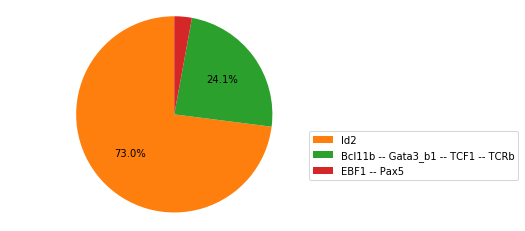

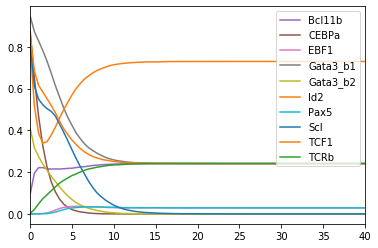

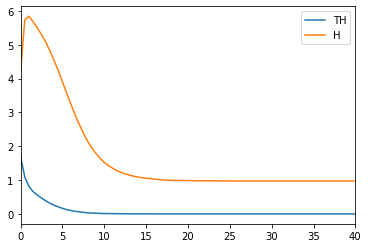

In [35]:
# Simulation of wild type
print("Simulation of wildtype background starting from ETP state with IL7 and Delta both ON")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer


Hence, for these intial conditions, close to 25% of cells reach T cellcommittment.

Simulation of wildtype background starting from ETP state with IL7 ON but Delta OFF
Entropy (TH) :
TH    0.0002
H     0.4148
Name: 15.5, dtype: float64


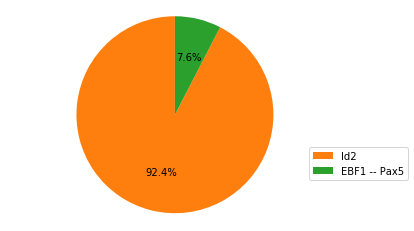

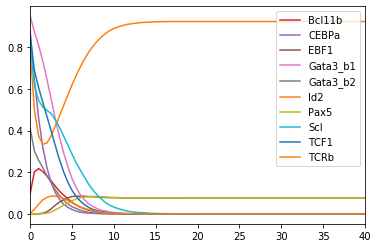

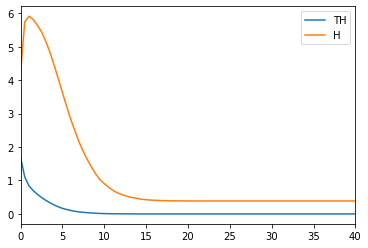

In [36]:
#simulation of the effect of absence of Delta
print("Simulation of wildtype background starting from ETP state with IL7 ON but Delta OFF")
maboss_simulation(lqm_Delta_LoF)


Hence, there is no T cell commitment at all, but more B progenitors are generated in the absence of Delta.

Simulation of Bcl11b loss-of-function starting from ETP state with IL7 and Delta both ON
Entropy (TH) :
TH    0.0011
H     1.0096
Name: 15.5, dtype: float64


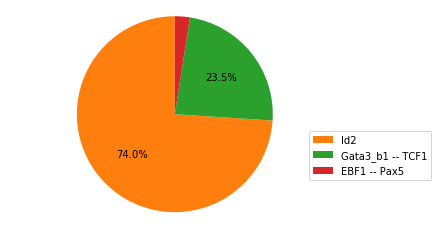

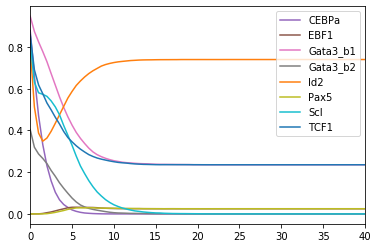

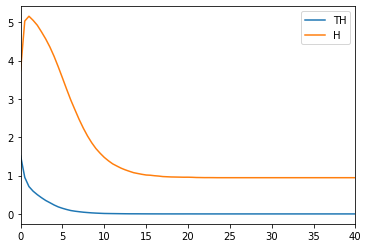

In [37]:
#simulation of Bcl11b loss-of-function
print("Simulation of Bcl11b loss-of-function starting from ETP state with IL7 and Delta both ON")
maboss_simulation(lqm_Bcl11b_LoF)


Hence, the loss-of-function of Bcl11b does not impede the activation of Gata3 and TCF1.

Simulation of Bcl11b gain-of-function from ETP state with IL7 and Delta both ON
Entropy (TH) :
TH    0.0026
H     1.3187
Name: 15.5, dtype: float64


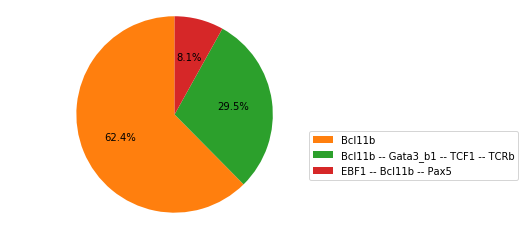

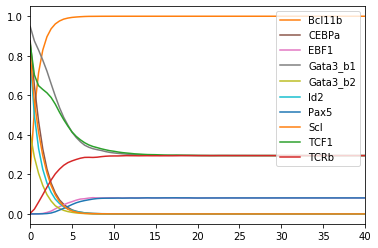

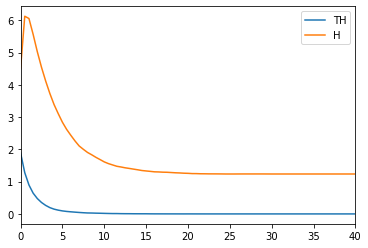

In [38]:
#simulation of Bcl11b gain-of-function
print("Simulation of Bcl11b gain-of-function from ETP state with IL7 and Delta both ON")
maboss_simulation(lqm_Bcl11b_GoF)


Hence, Bcl11b gain-of-function leads to a substantial increase of the proportion of committed cells.

Simulation of TCF1 loss-of-function from ETP state with IL7 and Delta both ON
Entropy (TH) :
TH    0.0003
H     1.0371
Name: 15.5, dtype: float64


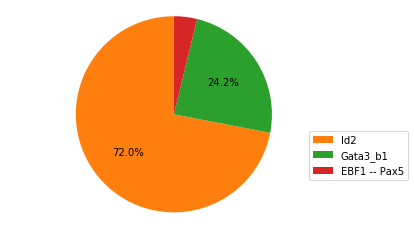

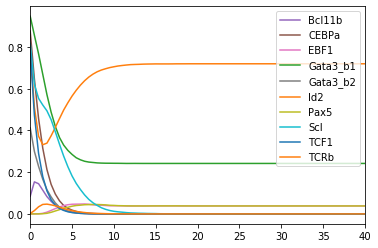

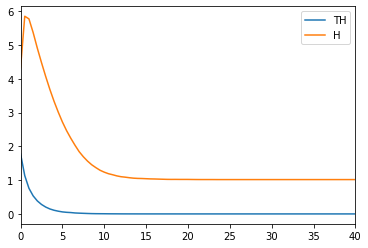

In [39]:
#Simulation of TCF1 loss-of-function
print("Simulation of TCF1 loss-of-function from ETP state with IL7 and Delta both ON")
maboss_simulation(lqm_TCF1_LoF)


Loss-of-function of TCF1 further impedes Bcl11b expression.

Simulation of TCF1 gain-of-function from ETP state with IL7 and Delta both ON
Entropy (TH) :
TH    0.0007
H     1.0471
Name: 15.5, dtype: float64


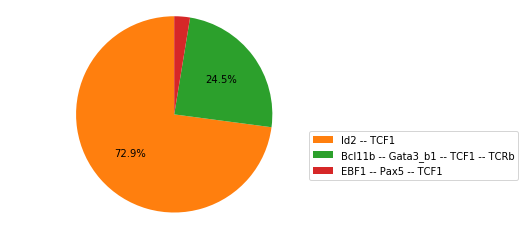

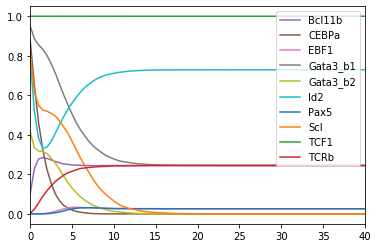

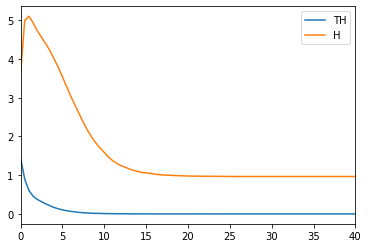

In [40]:
#simulation of TCF1 gain-of-function
print("Simulation of TCF1 gain-of-function from ETP state with IL7 and Delta both ON")
maboss_simulation(lqm_TCF1_GoF)


TCF1 gain-of-function does not substantially affect the proportion of committed cells.

Simulation of Gata3 loss-of-function from ETP state with IL7 and Delta both ON
Entropy (TH) :
TH    0.0003
H     1.0636
Name: 15.5, dtype: float64


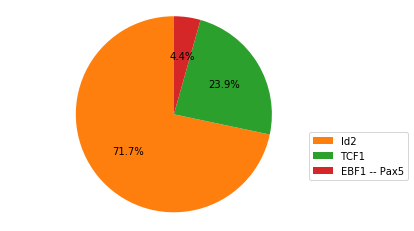

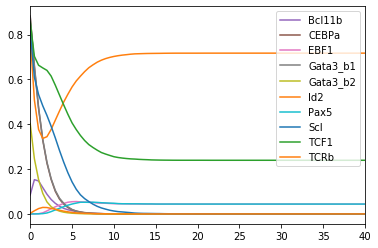

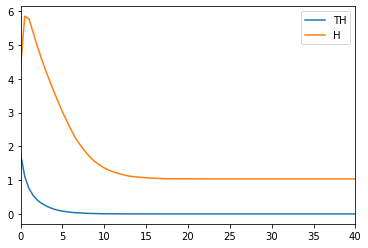

In [41]:
#simulation of GATA3 loss-of-function
print("Simulation of Gata3 loss-of-function from ETP state with IL7 and Delta both ON")
maboss_simulation(lqm_Gata3_LoF)


Hence, loss-of-function of Gata3 leads to a complete loss of T cell commitment (no activation of Bcl11b), but does not  preclude TCF1 activation.

Simulation of Gata3 gain-of-function from ETP state with IL7 and Delta both ON
Entropy (TH) :
TH    0.0001
H     0.8036
Name: 15.5, dtype: float64


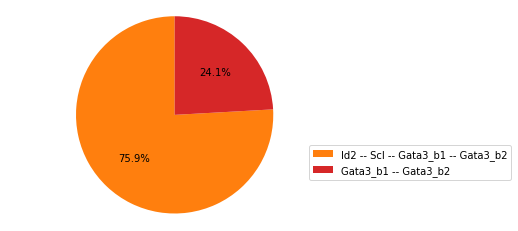

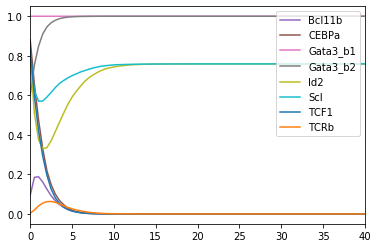

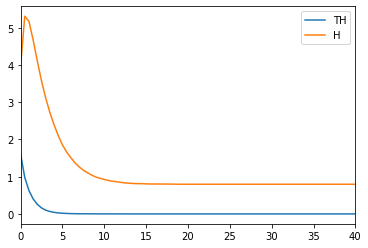

In [42]:
#simulation of GATA3 gain-of-function
print("Simulation of Gata3 gain-of-function from ETP state with IL7 and Delta both ON")
maboss_simulation(lqm_Gata3_GoF)


A gain-of-function of Gata3 (at level 2) impedes T cell commitment, and further block the activation of B cell (EBF1) and myeloid (CEBPa) markers.

Simulation of Runx1 loss-of-function from ETP state with IL7 and Delta both ON
Entropy (TH) :
TH    0.0010
H     0.0747
Name: 15.5, dtype: float64


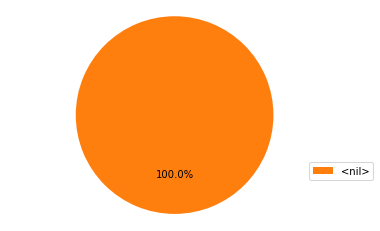

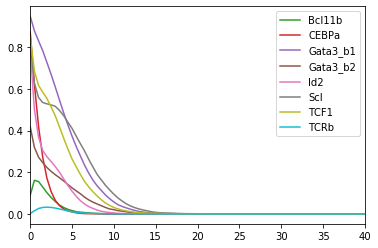

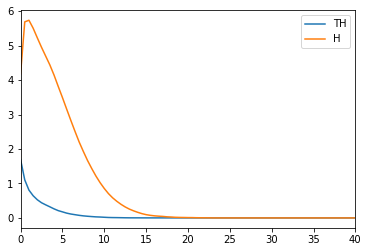

In [43]:
#simulation of Runx1 loss-of-function
print("Simulation of Runx1 loss-of-function from ETP state with IL7 and Delta both ON")
maboss_simulation(lqm_Runx1_LoF)


The loss-of-function of Runx1 leads to the collapse of the activation of all markers and hence to the loss of all cell fates.

Simulation of Runx1 gain-of-function from ETP state with IL7 and Delta both ON
Entropy (TH) :
TH    0.0009
H     1.0133
Name: 15.5, dtype: float64


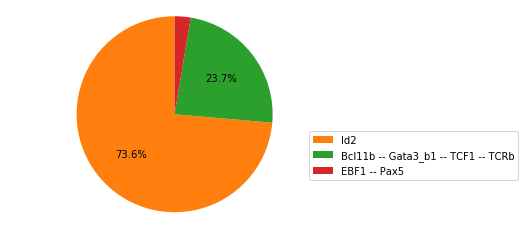

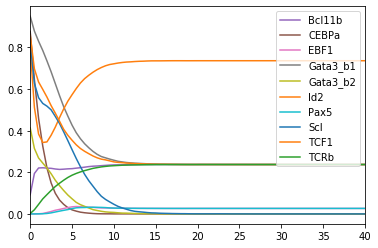

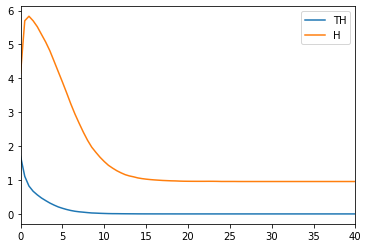

In [44]:
#simulation of Runx1 gain-of-function
print("Simulation of Runx1 gain-of-function from ETP state with IL7 and Delta both ON")
maboss_simulation(lqm_Runx1_GoF)


A gain-of-function of Runx1 (level 2) does not significantly affect T cell commitment, nor B cell alternative fate.

Simulation of ectopic expression of CEPBa and PU1 (level 2) in ETP in the presence of MCSF
Entropy (TH) :
TH    0.0000
H     0.0015
Name: 15.5, dtype: float64


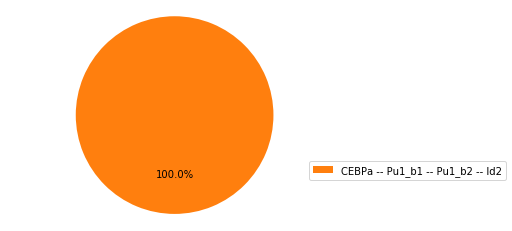

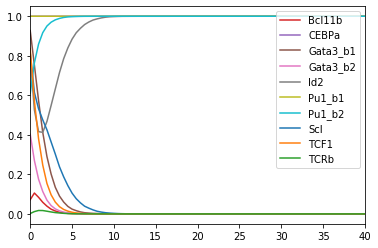

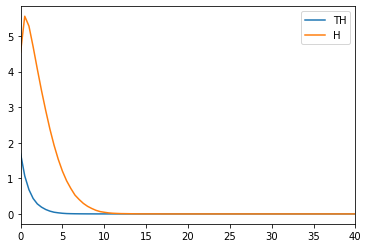

In [45]:
#simulation of ectopic expression of CEPBa and PU1 (level 2) at ETP stage.
mbs = biolqm.to_maboss(lqm_Pu1_CEBPa_GoF)
maboss.set_output(mbs, ["Bcl11b", "TCF1","Gata3_b1","Gata3_b2","EBF1","CEBPa","Scl", "Id2","Pu1_b1","Pu1_b2","TCRb"])
# DN1_ON_Nodes = ('MCSF','CEBPa','Id2','Id1','Id3','Scl','Lmo2','Gfi1b','Kit','Flt3','Pu1_b1','Lyl1','Hhex','Bcl11a','E2A_gene','E2A_protein','Myb','Runx3','HEB_gene','HEB','HEB_E2A','Runx1_b1','Gfi1',Notch_gene_b1','Notch1_rec','NTC','Nrarp')
# Definition of ETP state, but in presence of MCF and in absence of Delta and IL7
ETP_ON_Nodes = ('MCSF','CEBPa','Id2','Id1','Id3','Scl','Scl_E2A','Lmo2','Gfi1b','Kit','Flt3','Pu1_b1','Lyl1','Hhex','Bcl11a','E2A_gene','E2A_protein','Myb','Gata3_b1','TCF1','HEB_gene','HEB','HEB_E2A','Runx1_b1','Gfi1','Notch_gene_b1','NTC','Notch1_rec','IL7Ra_gene','IL7Ra_act','Stat5','Nrarp')
# maboss.set_nodes_istate(mbs, DN1_ON_Nodes, [0, 1])
maboss.set_nodes_istate(mbs, ETP_ON_Nodes, [0, 1])
simres = mbs.run()
print("Simulation of ectopic expression of CEPBa and PU1 (level 2) in ETP in the presence of MCSF")
print("Entropy (TH) :")
print(simres.get_entropy_trajectory().iloc[31]) 
simres.plot_piechart()
simres.plot_node_trajectory(until=40)
simres.plot_entropy_trajectory(until=40)


The ectopic expression of CEBPa and Pu1 (level 2), in the absence of Notch and IL7 but in the presence of MCSF, reprogram ETP into myeloid-like porgenitors and shut down the other cell type markers.

Simulation of ETP progression in absence of Delta, but in presence of IL7
Entropy (TH) :
TH    0.0000
H     0.3721
Name: 15.5, dtype: float64


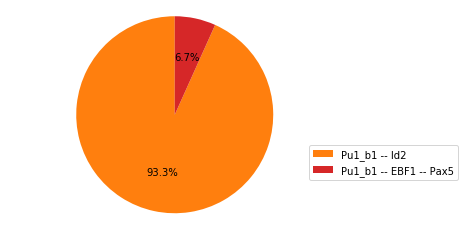

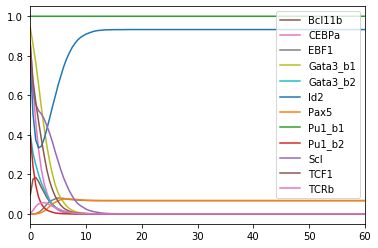

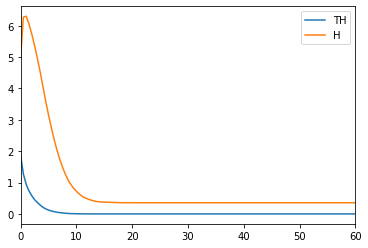

In [46]:
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
mbs = biolqm.to_maboss(lqm)
maboss.set_output(mbs, ["Bcl11b", "TCF1","Gata3_b1","Gata3_b2","EBF1","Pax5","CEBPa","Scl", "Id2","Pu1_b1","Pu1_b2","TCRb"])
# Definition of ETP state and simulation in absence of Delta, but in presence of IL7
ETP_ON_Nodes = ('IL7','CEBPa','Id2','Id1','Id3','Scl','Scl_E2A','Lmo2','Gfi1b','Kit','Flt3','Pu1_b1','Lyl1','Hhex','Bcl11a','E2A_gene','E2A_protein','Myb','Gata3_b1','TCF1','HEB_gene','HEB','HEB_E2A','Runx1_b1','Gfi1','Notch_gene_b1','NTC','Notch1_rec','IL7Ra_gene','IL7Ra_act','Stat5','Nrarp')
maboss.set_nodes_istate(mbs, ETP_ON_Nodes, [0, 1])
simres = mbs.run()
print("Simulation of ETP progression in absence of Delta, but in presence of IL7")
print("Entropy (TH) :")
print(simres.get_entropy_trajectory().iloc[31]) 
simres.plot_piechart()
simres.plot_node_trajectory(until=60)
simres.plot_entropy_trajectory(until=60)


Hence T cell fate is lost, while close to 5% of cells activate EBF1 and Pax5.

Simulation of ETP progression in absence of Delta and IL7, but in presence of MCSF
Entropy (TH) :
TH    0.0000
H     0.0534
Name: 15.5, dtype: float64


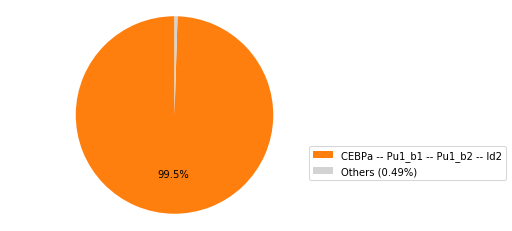

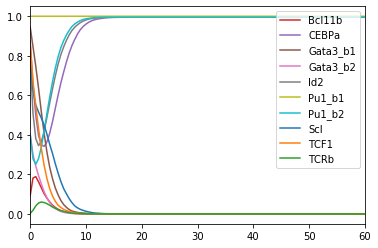

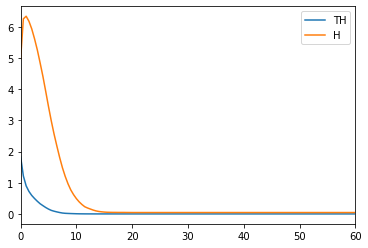

In [47]:
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
mbs = biolqm.to_maboss(lqm)
maboss.set_output(mbs, ["Bcl11b", "TCF1","Gata3_b1","Gata3_b2","EBF1","CEBPa","Scl", "Id2","Pu1_b1","Pu1_b2","TCRb"])
# Definition of  ETP state and simulation in absence of Delta and IL7, but in presence of MCSF
ETP_ON_Nodes = ('MCSF','CEBPa','Id2','Id1','Id3','Scl','Scl_E2A','Lmo2','Gfi1b','Kit','Flt3','Pu1_b1','Lyl1','Hhex','Bcl11a','E2A_gene','E2A_protein','Myb','Gata3_b1','TCF1','HEB_gene','HEB','HEB_E2A','Runx1_b1','Gfi1','Notch_gene_b1','NTC','Notch1_rec','IL7Ra_gene','IL7Ra_act','Stat5','Nrarp')
maboss.set_nodes_istate(mbs, ETP_ON_Nodes, [0, 1])
simres = mbs.run()
print("Simulation of ETP progression in absence of Delta and IL7, but in presence of MCSF")
print("Entropy (TH) :")
print(simres.get_entropy_trajectory().iloc[31]) 
simres.plot_piechart()
simres.plot_node_trajectory(until=60)
simres.plot_entropy_trajectory(until=60)


Both T and  B cell fates are lost, while most cells adopt a myeloid fate.